## Final Project Submission

Please fill out:
* Student name: kipkosgei kiptui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


As Microsoft aims to venture into the world of original video content creation by establishing a new movie studio but it lack the experience in the movie industry and it faces the challenge of identifying the most successful film genres in the current market. The objective is to provide actionable insights to guide Microsoft's new movie studio in determining the types of films to produce. 

objectives:
1.Identify Top-Performing Film Genres.
2.Correlate Genre Success with Box Office (revenues) Performance.
3.
3.Strategic Guidance for Film Production


In [1]:
import pandas as pd
import sqlite3
import zipfile
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with zipfile.ZipFile('im.db.zip', 'r') as zip_ref:
    zip_ref.extractall()

Connect to the SQLite database

In [3]:
conn = sqlite3.connect('im.db')

Display the tables in the database to examine the important tables for our analysis

In [6]:
cursor = conn.cursor()
# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


Create dataFrames for the analysis

In [10]:
#Load data from the movie_basics table in the SQLite database
movie_basics_query = "SELECT * FROM movie_basics"
movie_basics_df = pd.read_sql_query(movie_basics_query, conn)

In [11]:
#Load data from the movie_ratings table in the SQLite database
movie_ratings_query = "SELECT * FROM movie_ratings"
movie_ratings_df = pd.read_sql_query(movie_ratings_query, conn)

In [12]:
#Load data from the CSV file (box office gross data)
with gzip.open('bom.movie_gross.csv.gz', 'rb') as file:
    box_office_df = pd.read_csv(file)


In [13]:
df_movie_budget = pd.read_csv('tn.movie_budgets.csv')
df_movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


DATA CLEANING FOR PRODUCTION BUDGET DATA

In [14]:

# Replace '$' and commas and convert to numeric
df_movie_budget['production_budget'] = pd.to_numeric(df_movie_budget['production_budget'].str.replace('[\$,]', '', regex=True), errors='coerce')
df_movie_budget['domestic_gross'] = pd.to_numeric(df_movie_budget['domestic_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')
df_movie_budget['worldwide_gross'] = pd.to_numeric(df_movie_budget['worldwide_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [15]:
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [16]:
# Check for duplicate rows
#duplicates = df_movie_budget[df_movie_budget.duplicated()]
duplicate_rows = df_movie_budget[df_movie_budget.duplicated(keep='first')]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df_movie_budget.drop_duplicates(keep='first', inplace=True)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [17]:
missing_values = df_movie_budget.isna()  
# Count the missing values in each column
missing_values_count = missing_values.sum()

# Display the count of missing values in each column
print("Missing Values Count in Each Column:")
print(missing_values_count)

# Optionally, you can display the percentage of missing values in each column
total_rows = len(df_movie_budget)
missing_percentage = (missing_values_count / total_rows) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

Missing Values Count in Each Column:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Percentage of Missing Values in Each Column:
id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64


Explore and understand the loaded dataframes
You can use functions like .head(), .info(), .describe(), etc., to get an overview of the data.

In [18]:
movie_basics_df.shape

(146144, 6)

In [19]:
#Sample records from movie_basics:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [22]:
#Sample records from movie_ratings:
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
movie_ratings_df.shape

(73856, 3)

In [24]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [26]:
#Sample records from movie_ratings:
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [27]:
movie_ratings_df.shape

(73856, 3)

In [28]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
#Sample records from box_office_df
box_office_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [30]:
box_office_df.shape

(3387, 5)

In [31]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [32]:
box_office_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [33]:
box_office_df.shape

(3387, 5)

after data exploration now we clean the data in each dataframe to remove duplicates and missings values

In [34]:
#Check for Duplicate Values box_office_df
duplicate_rows = box_office_df[box_office_df.duplicated(keep='first')]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    box_office_df.drop_duplicates(keep='first', inplace=True)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [35]:
# Check for missing values in the entire DataFrame
missing_values = box_office_df.isna()  # or df.isnull()

# Count the missing values in each column
missing_values_count = missing_values.sum()

# Display the count of missing values in each column
print("Missing Values Count in Each Column:")
print(missing_values_count)

# Optionally, you can display the percentage of missing values in each column
total_rows = len(box_office_df)
missing_percentage = (missing_values_count / total_rows) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

Missing Values Count in Each Column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Percentage of Missing Values in Each Column:
title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


In [36]:
box_office_df_cleaned = box_office_df.dropna()

# Display the cleaned DataFrame
print("DataFrame after dropping missing values:")
box_office_df_cleaned

DataFrame after dropping missing values:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [37]:
#Check for Duplicate Values movie_ratings_df
duplicate_rows_r = movie_ratings_df[movie_ratings_df.duplicated(keep='first')]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    movie_ratings_df.drop_duplicates(keep='first', inplace=True)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [38]:
movie_ratings_df.drop_duplicates(inplace=True)

In [39]:
# Check for missing values in the entire DataFrame
missing_values = movie_ratings_df.isna()  

# Count the missing values in each column
missing_values_count = missing_values.sum()

# Display the count of missing values in each column
print("Missing Values Count in Each Column:")
print(missing_values_count)

# Optionally, you can display the percentage of missing values in each column
total_rows = len(movie_ratings_df)
missing_percentage = (missing_values_count / total_rows) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

Missing Values Count in Each Column:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

Percentage of Missing Values in Each Column:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64


In [40]:
#Check for Duplicate Values movie_basics_df
duplicate_rows_r = movie_basics_df[movie_basics_df.duplicated(keep='first')]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    movie_basics_df.drop_duplicates(keep='first', inplace=True)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [41]:
movie_basics_df.drop_duplicates(inplace=True)

In [42]:
# Check for missing values in the entire DataFrame
missing_values = movie_basics_df.isna()  # or df.isnull()

# Count the missing values in each column
missing_values_count = missing_values.sum()

# Display the count of missing values in each column
print("Missing Values Count in Each Column:")
print(missing_values_count)

# Optionally, you can display the percentage of missing values in each column
total_rows = len(movie_basics_df)
missing_percentage = (missing_values_count / total_rows) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

Missing Values Count in Each Column:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Percentage of Missing Values in Each Column:
movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [43]:
movie_basics_df_cleaned = movie_basics_df.dropna()
print("DataFrame after dropping missing values:")
movie_basics_df_cleaned

DataFrame after dropping missing values:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [44]:
box_office_df_cleaned = box_office_df_cleaned.dropna(subset=['domestic_gross', 'foreign_gross'])
print(box_office_df_cleaned.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [45]:
# Remove commas from box office gross columns and convert to float
box_office_df_cleaned['foreign_gross'] = box_office_df_cleaned['foreign_gross'].str.replace(',', '').astype(float)

In [46]:
# Calculate the total worldwide gross by summing domestic and foreign gross
box_office_df_cleaned['worldwide_gross'] = box_office_df_cleaned['domestic_gross'] + box_office_df_cleaned['foreign_gross']
box_office_df_cleaned

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [47]:
# Group movies by genre and calculate the average worldwide gross for each genre
genre_avg_gross = box_office_df_cleaned.groupby('title')['worldwide_gross'].mean().sort_values(ascending=False)

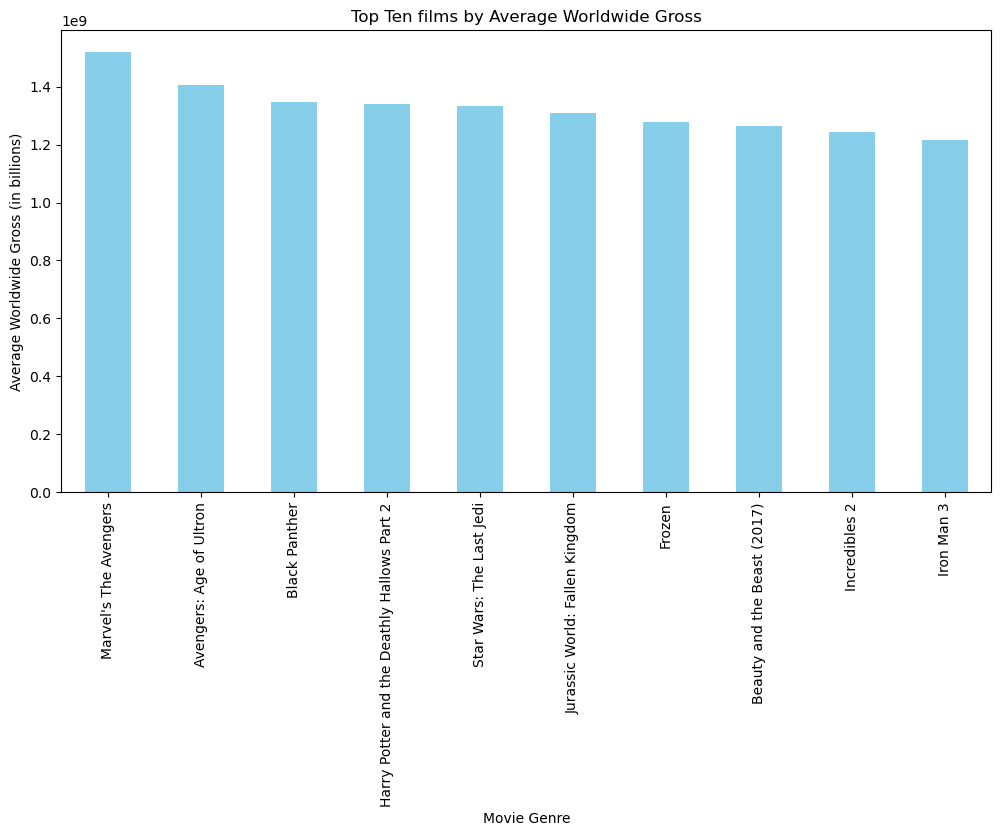

The top-performing genre by average worldwide gross is 'Marvel's The Avengers'.


In [48]:
# Data Visualization: Create a bar chart to visualize genre performance
plt.figure(figsize=(12, 6))
genre_avg_gross.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Movie Genre')
plt.ylabel('Average Worldwide Gross (in billions)')
plt.title('Top Ten films by Average Worldwide Gross')
plt.xticks(rotation=90)
plt.show()

# Display the top-performing genre
top_genre = genre_avg_gross.idxmax()
print(f"The top-performing genre by average worldwide gross is '{top_genre}'.")

- Perform data analysis to extract meaningful insights. for Audience Ratings, will Utilize data from the `movie_ratings` table in the SQLite database to identify highly-rated  movies to Determine if there is a correlation between audience ratings and box office success.


In [49]:
correlation = movie_ratings_df['averagerating'].corr(box_office_df_cleaned['domestic_gross'])
print(f"Correlation between Audience Rating and Box Office: {correlation:.2f}")


Correlation between Audience Rating and Box Office: -0.01


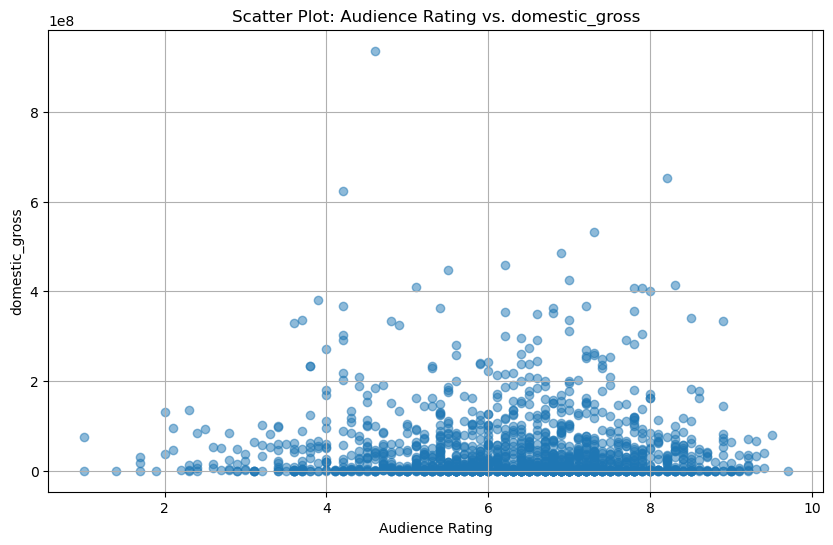

Correlation between Audience Rating and Box Office: -0.01


In [50]:
# Create a scatter plot to visualize the relationship between AudienceRating and BoxOffice
plt.figure(figsize=(10, 6))
plt.scatter(movie_ratings_df['averagerating'].head(1500), box_office_df_cleaned['domestic_gross'].head(1500), alpha=0.5)
plt.title('Scatter Plot: Audience Rating vs. domestic_gross')
plt.xlabel('Audience Rating')
plt.ylabel('domestic_gross')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation = movie_ratings_df['averagerating'].corr(box_office_df_cleaned['domestic_gross'])
print(f"Correlation between Audience Rating and Box Office: {correlation:.2f}")


A correlation of -0.01 between Audience Rating and domestic gross suggests that there is a very weak or negligible negative relationship between these two variables. In other words, as Audience Rating changes, there is very little to no consistent impact on the Box Office performance of a movie or production. The negative sign indicates that as one variable tends to increase, the other tends to decrease slightly, but the relationship is so weak that it is not practically significant.

lets look for correlation between Audience Rating and foreign_gross

In [51]:
correlation = movie_ratings_df['averagerating'].corr(box_office_df_cleaned['foreign_gross'])
print(f"Correlation between Audience Rating and Box Office: {correlation:.2f}")

Correlation between Audience Rating and Box Office: -0.02


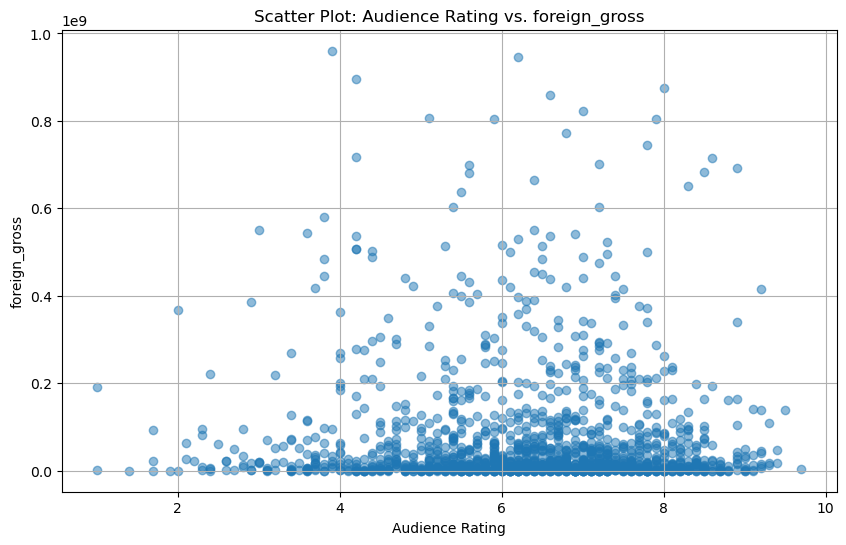

Correlation between Audience Rating and foreign_gross: -0.02


In [52]:
# Create a scatter plot to visualize the relationship between AudienceRating and BoxOffice
plt.figure(figsize=(10, 6))
plt.scatter(movie_ratings_df['averagerating'].head(1500), box_office_df_cleaned['foreign_gross'].head(1500), alpha=0.5)
plt.title('Scatter Plot: Audience Rating vs. foreign_gross')
plt.xlabel('Audience Rating')
plt.ylabel('foreign_gross')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation = movie_ratings_df['averagerating'].corr(box_office_df_cleaned['foreign_gross'])
print(f"Correlation between Audience Rating and foreign_gross: {correlation:.2f}")

A correlation of -0.02 between Audience Rating and foreign gross suggests that there is a very weak or negligible negative relationship between these two variables. In other words, as Audience Rating changes, there is very little to no consistent impact on the Box Office performance of a movie or production. The negative sign indicates that as one variable tends to increase, the other tends to decrease slightly, but the relationship is so weak that it is not practically significant.

lets check Release Date Analysis Determine if release dates (e.g., holiday seasons, summer, awards season) have an impact on revenue  success

In [53]:
# Rename the 'old_column_name' to 'new_column_name'
box_office_df_cleaned = box_office_df_cleaned.rename(columns={'title': 'primary_title'})

In [54]:
# Merge the datasets on the movie title to combine movie information with box office data
merged_df = pd.merge(movie_basics_df, box_office_df_cleaned, on='primary_title')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000.0,2012,8744000.0
1,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
2,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
4,tt5389486,On the Road,On the Road,2015,39.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...
2014,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",A24,44100000.0,35300000.0,2018,79400000.0
2015,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Par.,31700000.0,1800000.0,2018,33500000.0
2016,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,WGUSA,747000.0,82100000.0,2018,82847000.0
2017,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Strand,10800.0,150000.0,2010,160800.0


In [55]:

merged_df = merged_df.dropna()
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000.0,2012,8744000.0
1,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
2,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
4,tt5389486,On the Road,On the Road,2015,39.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...
2013,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",WB,2000000.0,542100000.0,2018,544100000.0
2014,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",A24,44100000.0,35300000.0,2018,79400000.0
2015,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Par.,31700000.0,1800000.0,2018,33500000.0
2016,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,WGUSA,747000.0,82100000.0,2018,82847000.0


In [56]:
# Convert 'release_year' column to numeric format
#merged_df['year'] = pd.to_numeric(merged_df['year'], errors='coerce')
merged_df.loc[:, 'year'] = pd.to_numeric(merged_df['year'], errors='coerce')

In [57]:
# Release Year Analysis
# Group movies by release year and calculate the median worldwide gross for each year
yearly_gross = merged_df.groupby('year')['worldwide_gross'].median().reset_index()
yearly_gross

,year,worldwide_gross
0,2010,29400000.0
1,2011,30800000.0
2,2012,21900000.0
3,2013,50000000.0
4,2014,42000000.0
5,2015,62100000.0
6,2016,69900000.0
7,2017,60300000.0
8,2018,75400000.0


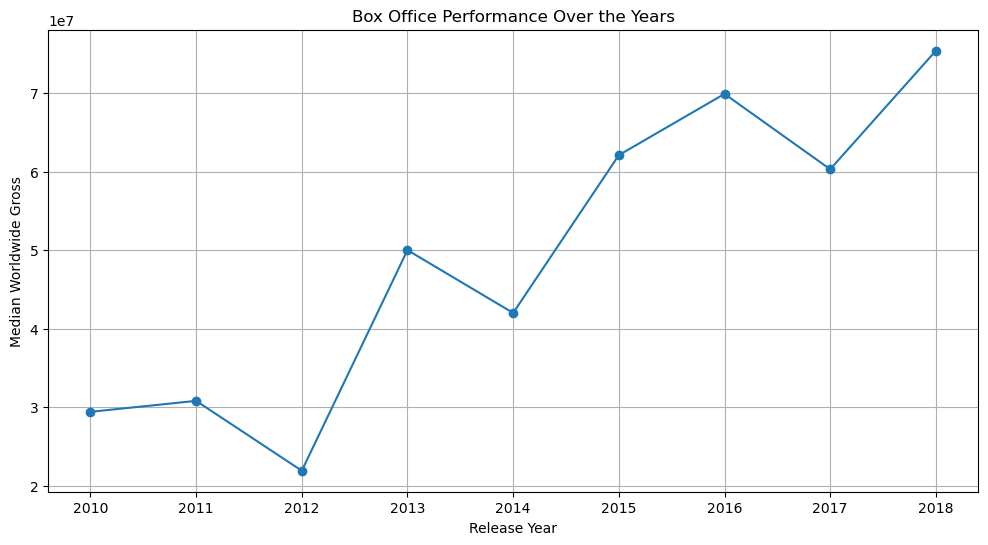

In [58]:
# Visualization
# Create a line plot to visualize box office performance over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_gross['year'], yearly_gross['worldwide_gross'], marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Median Worldwide Gross')
plt.title('Box Office Performance Over the Years')
plt.grid(True)
plt.show()

the diagam above shows Increasing Median Gross. this mean the median gross increases as the years progress, it suggests that, on average, movies released in more recent years tend to have earnings. This indicate that the movie industry is growing and that newer movies are attracting larger audiences.


we will Create informative data visualizations  charts and graphs to present our findings.


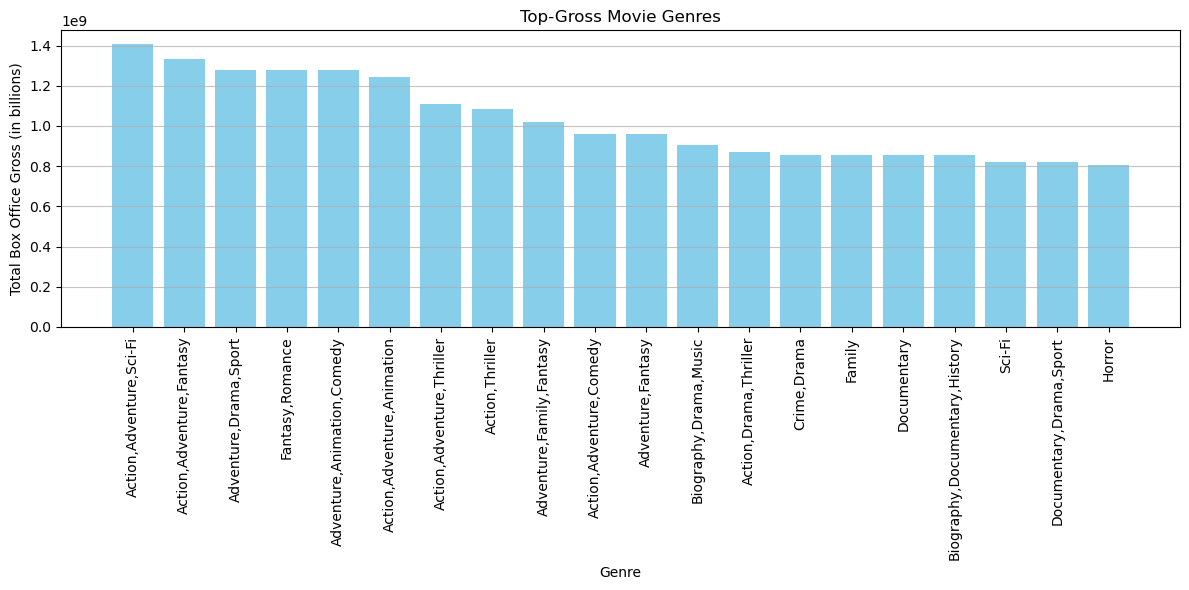

In [60]:
# Sort the DataFrame by total gross in descending order
genre_gross_df =merged_df.sort_values(by='worldwide_gross', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_gross_df['genres'].head(50), genre_gross_df['worldwide_gross'].head(50), color='skyblue')

# Customize the plot
plt.title('Top-Gross Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Total Box Office Gross (in billions)')
plt.xticks(rotation=90) 
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()


from the above we can clearly see from the top 50 on the list the genre we generate more gross to box office is Action,adventure,sci-fi down to the least is horror

analysis and calculate the correlation between movie production budget and box office gross 

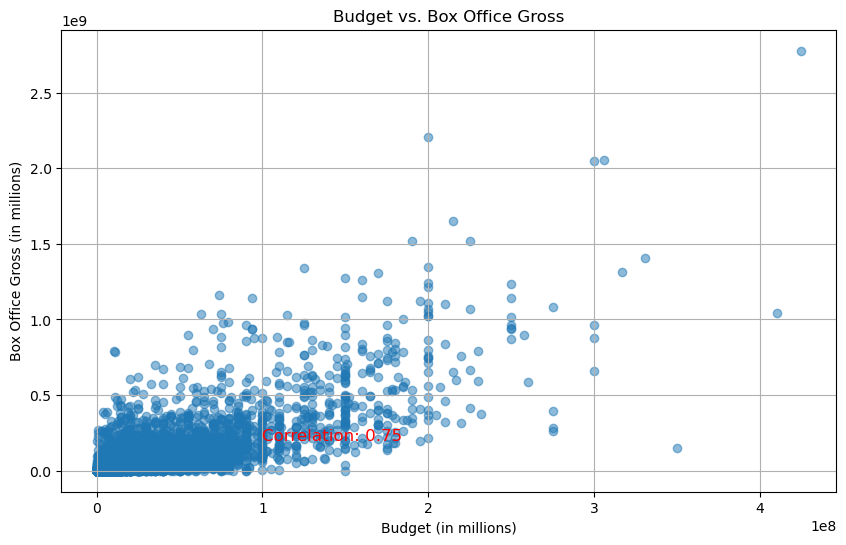

There is a positive correlation between budget and box office gross.


In [61]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_movie_budget['production_budget'], df_movie_budget['worldwide_gross'], alpha=0.5)
plt.title('Budget vs. Box Office Gross')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office Gross (in millions)')
plt.grid(True)

# Calculate the correlation coefficient
correlation = df_movie_budget['production_budget'].corr(df_movie_budget['worldwide_gross'])

# Display the correlation coefficient on the plot
plt.text(1e8, 2e8, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()

# Interpret the correlation coefficient:
if correlation > 0:
    print("There is a positive correlation between budget and box office gross.")
elif correlation < 0:
     print("There is a negative correlation between budget and box office gross.")
else:
    print("There is little to no linear correlation between budget and box office gross.")

A positive correlation between budget and box office gross suggests that, in general, as the budget allocated to producing and marketing a movie increases, the box office gross (revenue earned from ticket sales) tends to increase as well